# Perceptron Learning Algorithm

In [1]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def readdat(name):
    """
    Function readdat: reads data from a file.
    parameters: 
        string (name, filename)
    returns: 
        int (nn, number of input pairs)
        int (dd, number of dimensions)
        float (xx, array with nn rows and d+1 columns. 
                Contains x values for all example pairs (x,y).)
        int (yy, array with nn elements. 
                Contains y values for all example pairs (x,y).)
    """
    
    with open(name) as f:
        lines=f.read().splitlines()

    nn,dd=map(int,lines[0].split(' '))

    xy=np.zeros([nn,dd+1],dtype=np.float32)
    for ii in range(nn):
        tmp=lines[ii+1].split(' ')
        for jj in range(dd+1):
            xy[ii,jj]=np.float32(tmp[jj])

    xx=np.ones_like(xy)
    xx[:,1:]=xy[:,0:dd]
    yy=np.empty([nn],dtype=int)
    for ii in range(nn):
        yy[ii]=int(xy[ii,-1])
    
    return nn,dd,xx,yy   

In [3]:
def conv(xx,yy,ww):
    """
    Function conv: checks the convergence criterium hh==0,
    where hh is the sum of y-h(x) over all example pairs
    parameters:
        float (xx, array with nn rows and dd+1 columns. 
                Contains x values for all example pairs (x,y).)
        int (yy, array with nn elements. 
                Contains y values for all example pairs (x,y).)
        float (ww, array with dd+1 elements. Contains the weights.)
    returns: Boolean True when the convergence criterium hh==0 is satisfied, False otherwise.
        
    """
    hh=0
    for ii in range(nn):
        hh+=np.abs(yy[ii]-np.sign(np.dot(ww,xx[ii,:])))
    return (np.abs(hh)==0)

In [4]:
def pla(xx,yy,ww):
    """
    Function pla: perceptron learning algorithm
    parameters:
        float (xx, array with nn rows and d+1 columns. 
                Contains x values for all example pairs (x,y).)
        int (yy, array with nn elements. 
                Contains y values for all example pairs (x,y).)
        float (ww, array with d+1 elements. Contains the weights initial guess.)
    returns: 
        float (ww, array with d+1 elements. Contains the weights converged values.)
    """
    while not conv(xx,yy,ww):
        ii=randrange(nn)
        if (yy[ii]==1) and (np.dot(ww,xx[ii,:])<0):
            ww+=xx[ii,:] 
        if (yy[ii]==-1) and (np.dot(ww,xx[ii,:])>0):
            ww-=xx[ii,:]
    return ww

In [5]:
def score(nt,xt,yt,ww):
    """
    Function score: calculates the scoring of the trained model
    parameters:
        int (nt, number of input pairs in test data)
        float (xt, array with nt rows and dt+1 columns. 
                Contains x values for all example pairs in test data(x,y).)
        int (yt, array with nn elements. 
                Contains y values for all example pairs (x,y).)
        float (ww, array with dd+1 elements. Contains the converged weights.))
    return score
    """
    sc=0
    for ii in range(nt):
        ht=np.sign(np.dot(ww,xt[ii,:]))
        sc+=np.int(ht==yt[ii])
    return sc*100./nt

In [6]:
#main

#read training data
nn,dd,xx,yy=readdat('train.txt')

#initialize weights and converge them with the PLA
ww=np.random.uniform(0,1,size=dd+1)
ww=pla(xx,yy,ww)

#read testing data and score the model
nt,dt,xt,yt=readdat('test.txt')
testscore=score(nt,xt,yt,ww)
testscoretrain=score(nn,xx,yy,ww)

print(ww)
print(testscore)
print(testscoretrain)

[-227.26571944    2.25153661    3.54430285]
90.0
100.0


<IPython.core.display.Javascript object>


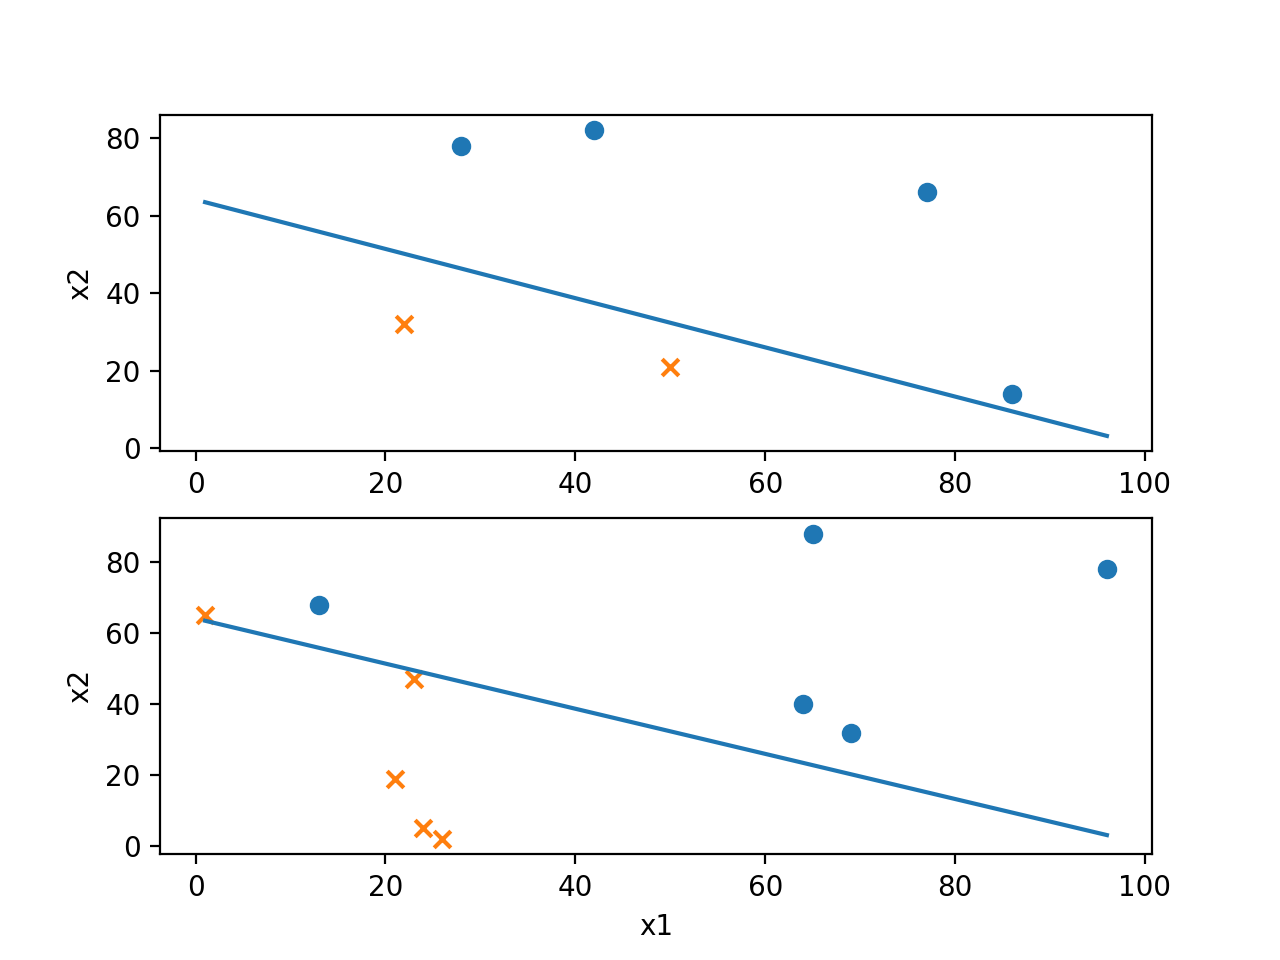

[-227.26571944    2.25153661    3.54430285]
90.0
100.0


In [7]:
if (dd==2):
    
    #Calculate aa and bb in the line aa.x+bb=0
    aa=-(ww[0]/ww[2])/(ww[0]/ww[1])
    bb=-ww[0]/ww[2]
    
    fig, axs = plt.subplots(2,1)
    xxt=np.concatenate((xx[:,1],xt[:,1]))
    minx=np.amin(xxt)
    maxx=np.amax(xxt)
    x = np.linspace(minx,maxx,2)
    
    axs[0].scatter(xx[yy==1,1],xx[yy==1,2],marker='o')
    axs[0].scatter(xx[yy==-1,1],xx[yy==-1,2],marker='x')
    axs[0].set_ylabel('x2')
    axs[0].plot(x,(aa*x+bb))
       
    axs[1].scatter(xt[yt==1,1],xt[yt==1,2],marker='o')
    axs[1].scatter(xt[yt==-1,1],xt[yt==-1,2],marker='x')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].plot(x,(aa*x+bb))
    
    plt.show()
    print(ww)
    print(testscore)
    print(testscoretrain)